# We would like to plot a few sample binaries and see how they evolve

In [9]:
import numpy as np
import matplotlib.pyplot as plt

import binary_c
import xrb
from xrb.src.core import *
from xrb.models import HMXB
from xrb.binary.binary_evolve import A_to_P, P_to_A

%matplotlib inline

### First, let's run an emcee sampler to get initial conditions for an HMXB

In [109]:
sampler = HMXB.run_emcee_population(nburn=2, nsteps=2, nwalkers=80)

Setting walkers...
...walkers are set
Starting burn-in...
...finished running burn-in
Starting full run...
...full run finished


### Now, let's run this binary, with the evolutionary output on

In [110]:
log_M1, log_M2, log_A, ecc, v_k_1, theta_1, phi_1, t_b = sampler.chain[0,0,:]


M1 = 10**log_M1
M2 = 10**log_M2
A = 10**log_A
orbital_period = A_to_P(M1, M2, A)
metallicity = 0.008


print M1, M2, A, ecc, v_k_1, theta_1, phi_1, t_b

output = binary_c.run_binary(M1, M2, orbital_period, ecc, metallicity, t_b, \
                             v_k_1, theta_1, phi_1, v_k_1, theta_1, phi_1, 1, 1)


evol_hist = output[-1]
evol_steps = evol_hist.split("\n")

evol_line = ""
n_comenv = "0"


times = np.array([])
mass_1 = np.array([])
mass_2 = np.array([])
radius_1 = np.array([])
radius_2 = np.array([])
P_orb = np.array([])
orb_sep = np.array([])
ecc = np.array([])

for s in evol_steps:

    if s.find("JEFF") == 0:

        data = s.split(" ")
#         print s
        
        times = np.append(times, float(data[1]))
        mass_1 = np.append(mass_1, float(data[4]))
        mass_2 = np.append(mass_2, float(data[5]))
        radius_1 = np.append(radius_1, float(data[6]))
        radius_2 = np.append(radius_2, float(data[7]))
        P_orb = np.append(P_orb, float(data[10])*365.25)
        orb_sep = np.append(orb_sep, float(data[11]))
        ecc = np.append(ecc, float(data[12]))
        
    if s.find("JEFF_K_CHANGE") == 0:
        data = s.split(" ")
            
        k1_before, k2_before, k1_after, k2_after = data[2], data[3], data[15], data[16]

        
        evol_line = evol_line + "Time = {:5.2f}".format(float(data[1])) + "   K-types "
        
        if n_comenv != data[28]:
            evol_line = evol_line + "(" + str(k1_before) + "-" + str(k2_before) + ":CE:" + str(k1_after) + "-" + str(k2_after) +  ")"
            n_comenv = data[28]
        else:
            evol_line = evol_line + "(" + str(k1_before) + "-" + str(k2_before) + ":" + str(k1_after) + "-" + str(k2_after) +  ")"
        evol_line = evol_line + "\n"
            
print evol_line

11.9865382913 9.69202701078 72.4164617352 0.00184992056828 179.118464705 2.2605521095 2.85242802925 24.7922971522
Time = 19.26   K-types (1-1:2-1)
Time = 19.30   K-types (2-1:3-1)
Time = 19.31   K-types (3-1:4-1)
Time = 19.33   K-types (4-1:7-1)
Time = 22.11   K-types (7-1:8-1)
Time = 22.30   K-types (8-1:13-1)



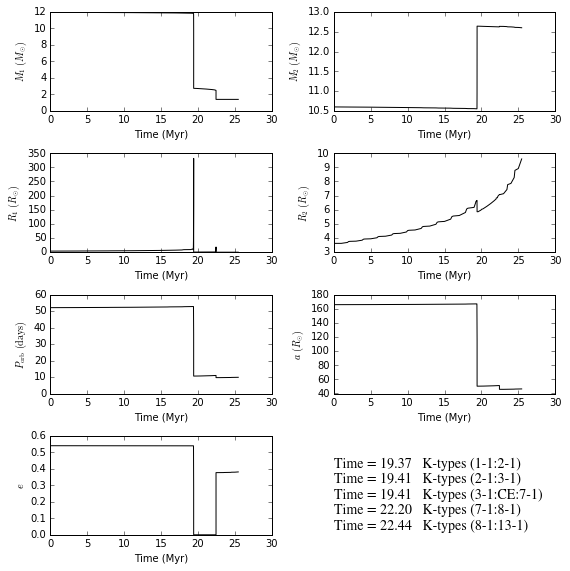

In [102]:
fig, ax = plt.subplots(4, 2, figsize=(8, 8))

data = mass_1, mass_2, radius_1, radius_2, P_orb, orb_sep, ecc


var = [r'$M_1\ (M_{\odot})$', r'$M_2\ (M_{\odot})$', r'$R_1\ (R_{\odot})$', r'$R_2\ (R_{\odot})$', \
       r'$P_{\rm orb}\ ({\rm days})$', r'$a\ (R_{\odot})$', r'$e$']

for i in np.arange(7):
    ky = i%2
    kx = i/2

    ax[kx,ky].plot(times, data[i], color='k')
    ax[kx,ky].set_xlabel("Time (Myr)")
    ax[kx,ky].set_ylabel(var[i])

    
ax[3,1].axis('off')
ax[3,1].text(0.0, -0.1, evol_line, fontsize=14, fontname='STIXGeneral')

    
plt.tight_layout()
# plt.savefig("../figures/evol_track_2.pdf")
plt.show()